In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2 
import glob
import random
from os import listdir
from sklearn.metrics import classification_report
import tensorflow as tf
import keras.utils as image


from keras.preprocessing import image

In [2]:
pat_fold = "F:/Data_Breast_Cancer/IDC_regular_ps50_idx5/"
folder = listdir(pat_fold)
len(folder)

279

In [3]:
cancer_img = glob.glob('F:/Data_Breast_Cancer/IDC_regular_ps50_idx5/**/*.png', recursive = True)
len(cancer_img)


277524

Notre base est composé de 279 patients. Le nombre total d'image est de 277524

# Exploration et analyse des données
## Visualisation des données

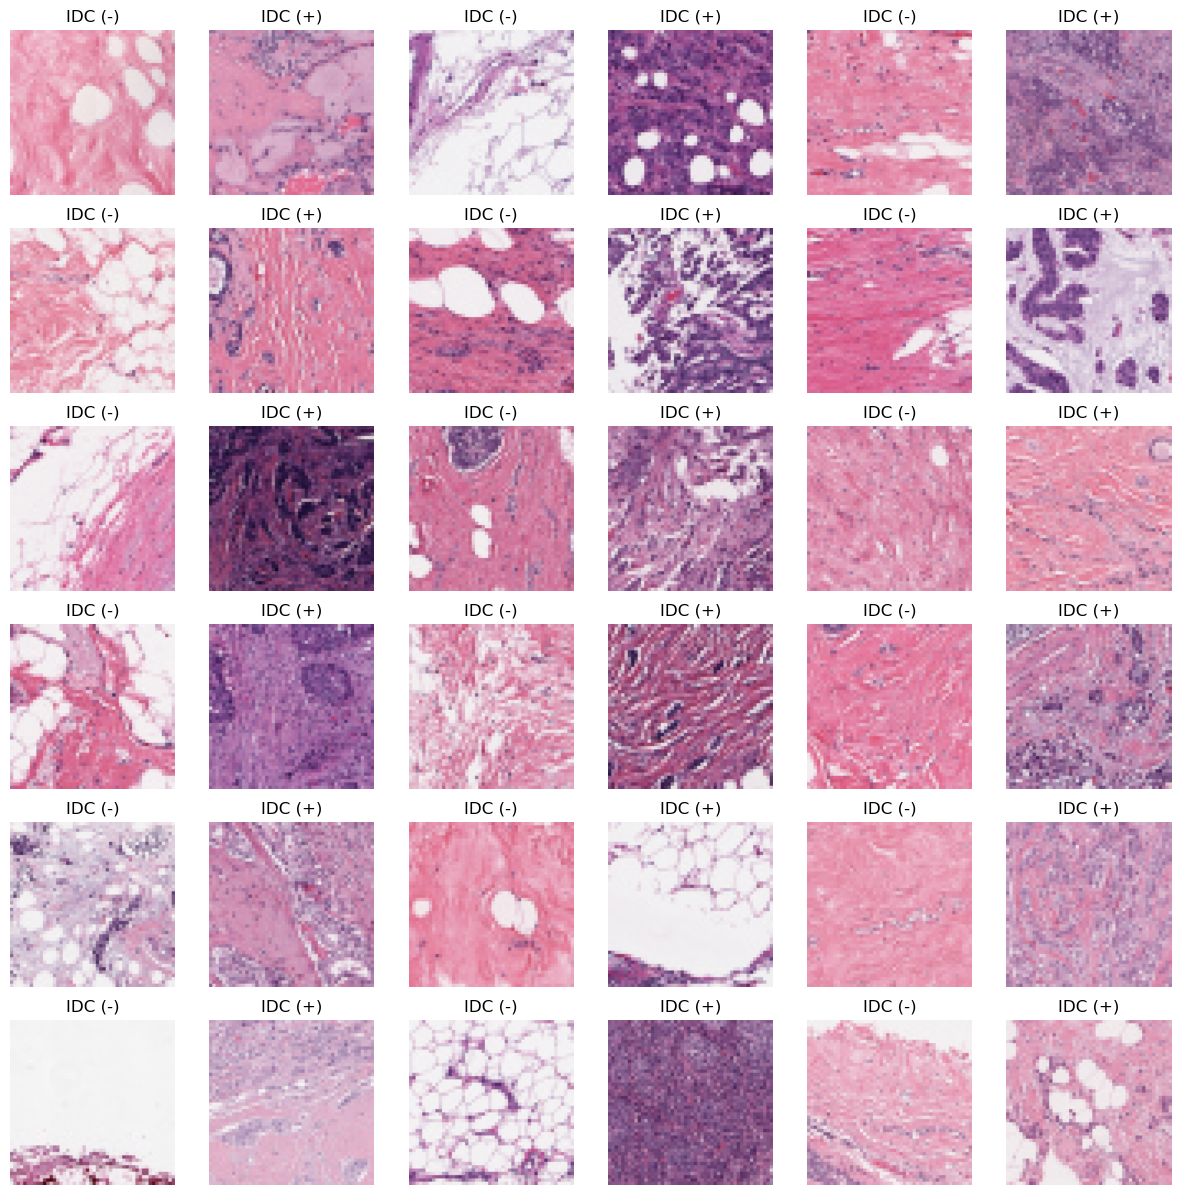

In [4]:
# Groupage des femmes Cancer + et Cancer -

N_IDC = [img for img in cancer_img if img[-5] == '0']
Y_IDC = [img for img in cancer_img if img[-5] == '1']
plt.figure(figsize=(15, 15))

# Sélection aléatoire d'indices pour les images sans cancer et avec cancer
indices_non_cancer = np.random.choice(len(N_IDC), size=18, replace=False)
indices_cancer = np.random.choice(len(Y_IDC), size=18, replace=False)

# Affichage des images sans cancer
for i, idx in enumerate(indices_non_cancer):
    img = image.load_img(N_IDC[idx], target_size=(100, 100))
    img = image.img_to_array(img)
    plt.subplot(6, 6, 2*i + 1)
    plt.axis('off')
    plt.title('IDC (-)')
    plt.imshow(img.astype('uint8'))

# Affichage des images avec cancer
for i, idx in enumerate(indices_cancer):
    img = image.load_img(Y_IDC[idx], target_size=(100, 100))
    img = image.img_to_array(img)
    plt.subplot(6, 6, 2*i + 2)
    plt.axis('off')
    plt.title('IDC (+)')
    plt.imshow(img.astype('uint8'))

plt.show()


In [5]:
# Nombre de femmes sans cancer (IDC négatif)
nb_femmes_negatif = len(N_IDC)

# Nombre de femmes avec cancer (IDC positif)
nb_femmes_positif = len(Y_IDC)

print("Nombre de femmes avec cancer (IDC positif) :", nb_femmes_positif)
print("Nombre de femmes sans cancer (IDC négatif) :", nb_femmes_negatif)


Nombre de femmes avec cancer (IDC positif) : 78786
Nombre de femmes sans cancer (IDC négatif) : 198738


Dans notre base de données 198738  sont négatifs du cancer contre 78786 négatifs

In [ ]:
# Ici nous normalisons les images et les stockons dans des tableux

N_Canc_img_arr = []
Y_can_img_arr = []

# Traitement des images sans cancer (IDC négatif)
for img in N_IDC:
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    if n_img is not None:
        n_img_size = cv2.resize(n_img, (50, 50), interpolation=cv2.INTER_LINEAR)
        n_img_size = n_img_size.astype('float32') / 255.0  
        # Normalisation des pixels
        N_Canc_img_arr.append([n_img_size, 0])

# Traitement des images avec cancer (IDC positif)
for img in Y_IDC:
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    if c_img is not None:
        c_img_size = cv2.resize(c_img, (50, 50), interpolation=cv2.INTER_LINEAR)
        c_img_size = c_img_size.astype('float32') / 255.0 
         # Normalisation des pixels
        Y_can_img_arr.append([c_img_size, 1])


In [34]:
NewN_IDC=N_IDC[:78786]
print(len(NewN_IDC))
print(len(Y_IDC))

78786
78786
